In [135]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import datetime
import seaborn as sns
today = datetime.datetime.today().strftime('%Y-%m-%d')


# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Odf1Yqx30X759l9IHDldUTU8M"
consumer_secret = "od61QkBbBIP6BAzdVUGU716oM4O57XSKlYGeCXhB0aNq37wfoo"
access_token = "943251070754672640-tPfS6k199feWr75lI9BLfivMAleR93D"
access_token_secret = "g9AtdaknzWb3w59cJI3mnu1yIaFZ3MHEpAdbq6g8KJw5v"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [136]:
target_users = ["@BBC", "@CNN", "@CBSNews", "@FoxNews", "@nytimes"]


# Variables for holding sentiments
sentiments = []
news = []
account =[]
date = []
text =[]
tweet_number=[]
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

# Loop through 100 tweets:
for user in target_users:
    # Counter
    counter = 1

    # Get all tweets from home feed
    public_tweets = api.user_timeline(user, count=100, result_type="recent")

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"], 
                           "User": (tweet['user']['name']),
                           "Text": (tweet["text"]),
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

In [146]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
#Export to CSV
sentiments_pd.to_csv("TwitterSentiments.csv")

sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago,User
0,0.7650,Wed Dec 27 14:41:32 +0000 2017,0.742,0.000,0.258,RT @BBCSport: It was a record-breaking few day...,1,BBC
1,0.0000,Wed Dec 27 14:33:19 +0000 2017,1.000,0.000,0.000,RT @BBC_Future: ⚡️ “BBC Future's Most Read Sto...,2,BBC
2,0.0000,Wed Dec 27 14:30:04 +0000 2017,1.000,0.000,0.000,Your brain could store all data on the searcha...,3,BBC
3,0.4404,Wed Dec 27 14:12:25 +0000 2017,0.838,0.000,0.162,RT @BBCFood: .@BegumNadiya's dal makes a quick...,4,BBC
4,-0.5267,Wed Dec 27 14:12:16 +0000 2017,0.855,0.145,0.000,RT @BBCWthrWatchers: Our #WeatherWatchers are ...,5,BBC


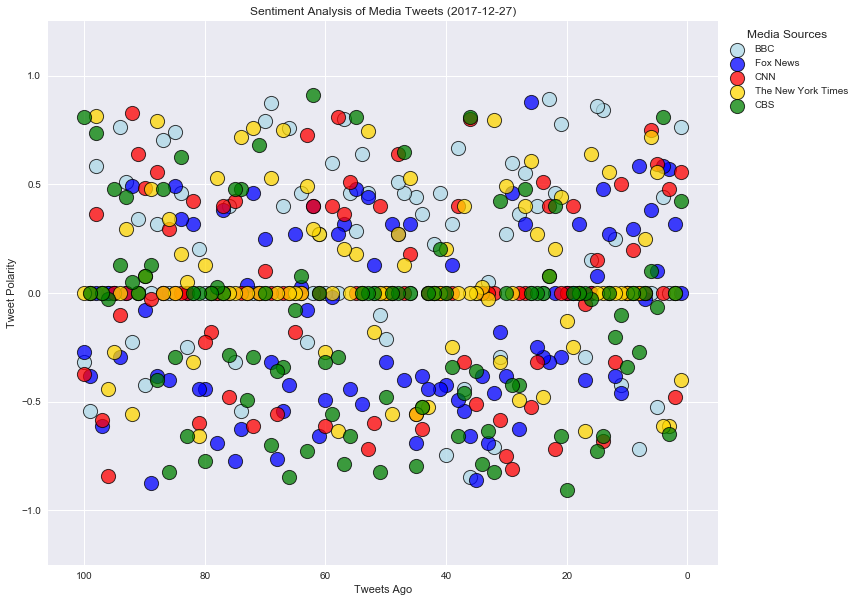

In [144]:
#plot analysis based on newtwork
BBC = sentiments_pd.loc[sentiments_pd['User'] == 'BBC']
FOX = sentiments_pd.loc[sentiments_pd['User'] == 'Fox News']
CNN = sentiments_pd.loc[sentiments_pd['User'] == 'CNN']
NYT = sentiments_pd.loc[sentiments_pd['User'] == 'The New York Times']
CBS = sentiments_pd.loc[sentiments_pd['User'] == 'CBS News']

#Color and Size of Figure
sns.set(style="darkgrid")
plt.figure(figsize = (12,10))

#Plot points
plt.scatter(BBC["Tweets Ago"], BBC["Compound"], label = "BBC", marker="o", c=["lightblue"], edgecolors="black", s=200, linewidth=1, alpha=.75)
plt.scatter(FOX["Tweets Ago"], FOX["Compound"], label = "Fox News", marker="o", c=["blue"], edgecolors="black", s=200, linewidth=1, alpha=.75)
plt.scatter(CNN["Tweets Ago"], CNN["Compound"], label = "CNN", marker="o", c=["red"], edgecolors="black", s=200, linewidth=1,alpha=.75)
plt.scatter(NYT["Tweets Ago"], NYT["Compound"], label = "The New York Times", marker="o", c=["gold"], edgecolors="black",s=200, linewidth=1, alpha=.75)
plt.scatter(CBS["Tweets Ago"], CBS["Compound"], label = "CBS", marker="o", c=["green"], edgecolors="black", s=200, linewidth=1, alpha=.75)

# Plot field size
plt.xlim(-5, counter + 5)
plt.ylim(-1.25, 1.25)

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets (%s)" % today)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(color="white")

plt.legend(title="Media Sources", bbox_to_anchor=(1, 1), edgecolor="white")

# Save the figure
plt.savefig("Sentiment_Analysis.png")

# invert x axis
ax = plt.gca()
ax.invert_xaxis()

# Show plot
plt.show()

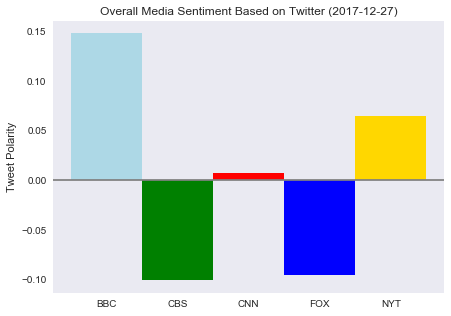

In [145]:
#Create new dataframe based off of compound average
overall_sentiments = pd.DataFrame(sentiments_pd.groupby("User")["Compound"].mean())
plt.figure(figsize = (7,5))

x_axis = np.arange(len(overall_sentiments["Compound"]))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])

plt.bar(x_axis, overall_sentiments["Compound"], color=["lightblue", 'green', 'red', 'blue', 'gold'], 
       width=1,)
plt.axhline(0, color="gray")
plt.grid(False)


plt.title("Overall Media Sentiment Based on Twitter (%s)" % today)
plt.ylabel("Tweet Polarity")
          
# Save the figure
plt.savefig("Overall_sentiment.png")

plt.show()
